In [33]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [34]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [35]:

# Nx = 36
# Ny = 21
# Nz = 5
# N_parcel = 3780

Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    

directory = '/n/home12/hongwei/Paper_2/Plot_python/Lifetime/'
filename = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory+filename)

/n/home12/hongwei/Paper_2/Plot_python/Lifetime/Lifetime_20000101.txt


In [36]:
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime.shape

(6, 21, 24, 10, 12, 10)

In [37]:
Pressure = [100, 75, 65, 55, 40, 30] # hPa
Height   = [16,  18, 19, 20, 22, 24] # km

In [38]:
for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File = open(directory+filename, 'r')
        
            Lines = File.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line in Lines:
                a = line.split(',')
                data.append(float(a[0]))
                data_N.append(float(a[1]))
                data_S.append(float(a[2]))
                Longitude.append(float(a[3]))
                Latitude.append(float(a[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        lifetime[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

100%|██████████| 12/12 [00:01<00:00,  7.75it/s]


In [39]:
# create seasonal data
# lifetime = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime_Winter_mon = np.zeros((Nz, Ny, Nx, 3, N_year))

# for Winter month
lifetime_Winter_mon[:,:,:,0:3,:] = np.mean(lifetime[:,:,:,:,[0,1,11],:], axis=(3))

# 10-year mean
lifetime_Winter_mon_mean = np.mean(lifetime_Winter_mon[:,:,:,:,:], axis=4)


### Change the Lon and Lat order, and change the lifetime data order in corresponding to the Lon/Lat order

In [40]:
LON_1d = LON[0,0,:,0,0,0]
LAT_1d = LAT[0,:,0,0,0,0]

# First for LON: change (0,360) to (-180,180)

lifetime_Winter_mon_new = np.zeros((Nz, Ny, Nx, 3, N_year))

lifetime_Winter_mon_mean_new = np.zeros((Nz, Ny, Nx, 3))


print("LON Before: ", LON_1d)
print("---")

for i in range(len(LON_1d)):
    if LON_1d[i]>=180: LON_1d[i] = LON_1d[i]-360

print("LON After: ", LON_1d)
        
# sort
idx = np.argsort(LON_1d)
# print(idx)

LON_1d = LON_1d[idx]

lifetime_Winter_mon_new = lifetime_Winter_mon[:,:,idx,:,:]

lifetime_Winter_mon_mean_new = lifetime_Winter_mon_mean[:,:,idx,:]

print("LON After: ", LON_1d)

print("")
print(lifetime_Winter_mon_mean_new.shape)

LON Before:  [  0.  15.  30.  45.  60.  75.  90. 105. 120. 135. 150. 165. 180. 195.
 210. 225. 240. 255. 270. 285. 300. 315. 330. 345.]
---
LON After:  [   0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.
 -180. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.]
LON After:  [-180. -165. -150. -135. -120. -105.  -90.  -75.  -60.  -45.  -30.  -15.
    0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.]

(6, 21, 24, 3)


In [41]:
# Second for LAT: change (-20,20) to (20,-20)

lifetime_Winter_mon_new2 = np.zeros((Nz, Ny, Nx, 3, N_year))

lifetime_Winter_mon_mean_new2 = np.zeros((Nz, Ny, Nx, 3))


print("LAT Before: ", LAT_1d)
LAT_1d = LAT_1d[::-1]
print("LAT After: ", LAT_1d)

lifetime_Winter_mon_new2 = lifetime_Winter_mon_new[:,::-1,:,:,:]

lifetime_Winter_mon_mean_new2 = lifetime_Winter_mon_mean_new[:,::-1,:,:]

print("")
print(lifetime_Winter_mon_mean_new.shape)

LAT Before:  [-30. -27. -24. -21. -18. -15. -12.  -9.  -6.  -3.   0.   3.   6.   9.
  12.  15.  18.  21.  24.  27.  30.]
LAT After:  [ 30.  27.  24.  21.  18.  15.  12.   9.   6.   3.   0.  -3.  -6.  -9.
 -12. -15. -18. -21. -24. -27. -30.]

(6, 21, 24, 3)


# *** important check ***

(1) The lat dimension should start from 20 and end at -20 for the input data in the following plotting code!!!

(2) The lon dimension should start from -180 and end at 180 for the input data in the following plotting code!!!


### calcualte the mean lifetime of selected regions in 18 km winter

In [42]:
ilon1a = 16
ilon1b = 20
LON_1d[ilon1a:ilon1b]

array([ 60.,  75.,  90., 105.])

In [43]:
ilon2a = 4
ilon2b = 8
LON_1d[ilon2a:ilon2b]

array([-120., -105.,  -90.,  -75.])

In [44]:
ilat1 = 7
ilat2 = 14
LAT_1d[ilat1:ilat2]

array([ 9.,  6.,  3.,  0., -3., -6., -9.])

In [45]:
#[1=18km, lat, lon, 0=winter]

Box_red = np.mean(lifetime_Winter_mon_mean_new2[1,ilat1:ilat2,ilon1a:ilon1b,0:3], axis=(0,1,2)) /365.25

Box_blue = np.mean(lifetime_Winter_mon_mean_new2[1,ilat1:ilat2,ilon2a:ilon2b,0:3], axis=(0,1,2)) /365.25

print(Box_red, Box_blue, (Box_red-Box_blue)/Box_blue)

print(f"Even in the same injection lat and altitude (18 km), \
particle lifetime from the red box can be more than 20% larger than that from blue box ")

1.3820853296828657 1.1094534076464262 0.24573535054058357
Even in the same injection lat and altitude (18 km), particle lifetime from the red box can be more than 20% larger than that from blue box 


In [46]:
#[1=18km, lat, lon, 0=winter]

Box_red_2 = np.mean(lifetime_Winter_mon_new2[1,ilat1:ilat2,ilon1a:ilon1b,0:3,:], axis=(0,1)) /365.25
lifetime_red_series = Box_red_2.flatten('F')

Box_blue_2 = np.mean(lifetime_Winter_mon_new2[1,ilat1:ilat2,ilon2a:ilon2b,0:3,:], axis=(0,1)) /365.25
lifetime_blue_series = Box_blue_2.flatten('F')

print(Box_blue_2)
print("===")
print(lifetime_blue_series)


[[1.57454777 1.16089762 0.80731397 1.11520485 1.04493009 1.0477755
  0.86156253 1.09675369 1.09883641 1.08668231]
 [1.37751051 1.11030605 1.06944363 1.22087611 0.93002836 1.26454483
  0.97567224 1.42262638 1.12639093 1.22072944]
 [0.93243375 0.92834653 1.30131026 0.93351912 1.1372641  1.1156742
  1.1987093  1.05538281 0.88505916 1.18326978]]
===
[1.57454777 1.37751051 0.93243375 1.16089762 1.11030605 0.92834653
 0.80731397 1.06944363 1.30131026 1.11520485 1.22087611 0.93351912
 1.04493009 0.93002836 1.1372641  1.0477755  1.26454483 1.1156742
 0.86156253 0.97567224 1.1987093  1.09675369 1.42262638 1.05538281
 1.09883641 1.12639093 0.88505916 1.08668231 1.22072944 1.18326978]


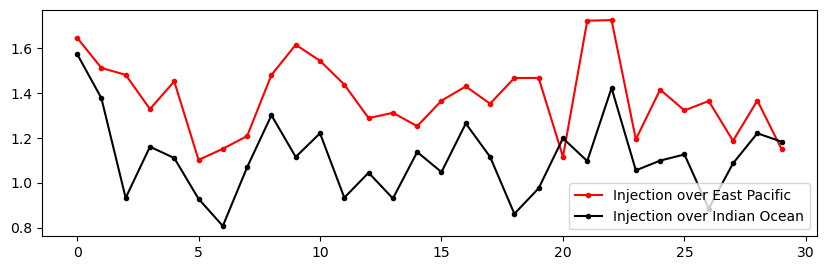

In [47]:
fig = plt.figure(figsize=(10,3), dpi=100)

plt.plot(lifetime_red_series, 'r.-', label='Injection over East Pacific')
plt.plot(lifetime_blue_series, 'k.-', label='Injection over Indian Ocean')

plt.legend();

### Use ERA5 presssure lever data to plot U, V, W in the same boxes for comparison

In [48]:
ERA5_red  = xr.open_dataset('/n/home12/hongwei/Paper_2/UVW_70hPa_DJF_Red_Box.nc')

U_red = ERA5_red["u"].mean(["longitude","latitude"])
V_red = ERA5_red["v"].mean(["longitude","latitude"])
W_red = ERA5_red["w"].mean(["longitude","latitude"])
Z_red = ERA5_red["z"].mean(["longitude","latitude"])

U_abs_red = abs(ERA5_red["u"]).mean(["longitude","latitude"])
V_abs_red = abs(ERA5_red["v"]).mean(["longitude","latitude"])
W_abs_red = abs(ERA5_red["w"]).mean(["longitude","latitude"])

U_red_N = np.mean( ERA5_red["u"][:,0:41,:], axis=(1,2) )
V_red_N = np.mean( ERA5_red["v"][:,0:41,:], axis=(1,2) )
W_red_N = np.mean( ERA5_red["w"][:,0:41,:], axis=(1,2) )
Z_red_N = np.mean( ERA5_red["z"][:,0:41,:], axis=(1,2) )

U_red_S = np.mean( ERA5_red["u"][:,41::,:], axis=(1,2) )
V_red_S = np.mean( ERA5_red["v"][:,41::,:], axis=(1,2) )
W_red_S = np.mean( ERA5_red["w"][:,41::,:], axis=(1,2) )
Z_red_S = np.mean( ERA5_red["z"][:,41::,:], axis=(1,2) )

In [49]:
ERA5_red

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 181, time: 30)
Coordinates:
  * longitude  (longitude) float32 60.0 60.25 60.5 60.75 ... 104.5 104.8 105.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -9.25 -9.5 -9.75 -10.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2009-12-01
Data variables:
    z          (time, latitude, longitude) float32 1.816e+05 ... 1.821e+05
    u          (time, latitude, longitude) float32 -1.534 -1.54 ... -2.484
    v          (time, latitude, longitude) float32 0.02703 0.02211 ... 0.3883
    w          (time, latitude, longitude) float32 0.0001032 ... -0.0006128
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 18:15:12 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [50]:
ERA5_black  = xr.open_dataset('/n/home12/hongwei/Paper_2/UVW_70hPa_DJF_Black_Box.nc')

U_black = ERA5_black["u"].mean(["longitude","latitude"])
V_black = ERA5_black["v"].mean(["longitude","latitude"])
W_black = ERA5_black["w"].mean(["longitude","latitude"])
Z_black = ERA5_black["z"].mean(["longitude","latitude"])

U_abs_black = abs(ERA5_black["u"]).mean(["longitude","latitude"])
V_abs_black = abs(ERA5_black["v"]).mean(["longitude","latitude"])
W_abs_black = abs(ERA5_black["w"]).mean(["longitude","latitude"])

U_black_N = np.mean( ERA5_black["u"][:,0:41,:], axis=(1,2) )
V_black_N = np.mean( ERA5_black["v"][:,0:41,:], axis=(1,2) )
W_black_N = np.mean( ERA5_black["w"][:,0:41,:], axis=(1,2) )
Z_black_N = np.mean( ERA5_black["z"][:,0:41,:], axis=(1,2) )

U_black_S = np.mean( ERA5_black["u"][:,41::,:], axis=(1,2) )
V_black_S = np.mean( ERA5_black["v"][:,41::,:], axis=(1,2) )
W_black_S = np.mean( ERA5_black["w"][:,41::,:], axis=(1,2) )
Z_black_S = np.mean( ERA5_black["z"][:,41::,:], axis=(1,2) )

ERA5_black

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 181, time: 30)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -75.5 -75.25 -75.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -9.25 -9.5 -9.75 -10.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2009-12-01
Data variables:
    z          (time, latitude, longitude) float32 1.816e+05 ... 1.822e+05
    u          (time, latitude, longitude) float32 0.7761 0.6794 ... -4.844
    v          (time, latitude, longitude) float32 2.346 2.371 ... -0.2894
    w          (time, latitude, longitude) float32 -0.001198 ... -0.0002887
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 18:14:11 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [51]:
ERA5_red["latitude"][0:41]

<xarray.DataArray 'latitude' (latitude: 41)>
array([10.  ,  9.75,  9.5 ,  9.25,  9.  ,  8.75,  8.5 ,  8.25,  8.  ,  7.75,
        7.5 ,  7.25,  7.  ,  6.75,  6.5 ,  6.25,  6.  ,  5.75,  5.5 ,  5.25,
        5.  ,  4.75,  4.5 ,  4.25,  4.  ,  3.75,  3.5 ,  3.25,  3.  ,  2.75,
        2.5 ,  2.25,  2.  ,  1.75,  1.5 ,  1.25,  1.  ,  0.75,  0.5 ,  0.25,
        0.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 10.0 9.75 9.5 9.25 9.0 ... 0.75 0.5 0.25 0.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [52]:
abs(ERA5_black)

<xarray.Dataset>
Dimensions:    (latitude: 81, longitude: 181, time: 30)
Coordinates:
  * longitude  (longitude) float32 -120.0 -119.8 -119.5 ... -75.5 -75.25 -75.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -9.25 -9.5 -9.75 -10.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2009-12-01
Data variables:
    z          (time, latitude, longitude) float32 1.816e+05 ... 1.822e+05
    u          (time, latitude, longitude) float32 0.7761 0.6794 ... 4.802 4.844
    v          (time, latitude, longitude) float32 2.346 2.371 ... 0.3065 0.2894
    w          (time, latitude, longitude) float32 0.001198 ... 0.0002887
Attributes:
    Conventions:  CF-1.6
    history:      2022-07-14 18:14:11 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

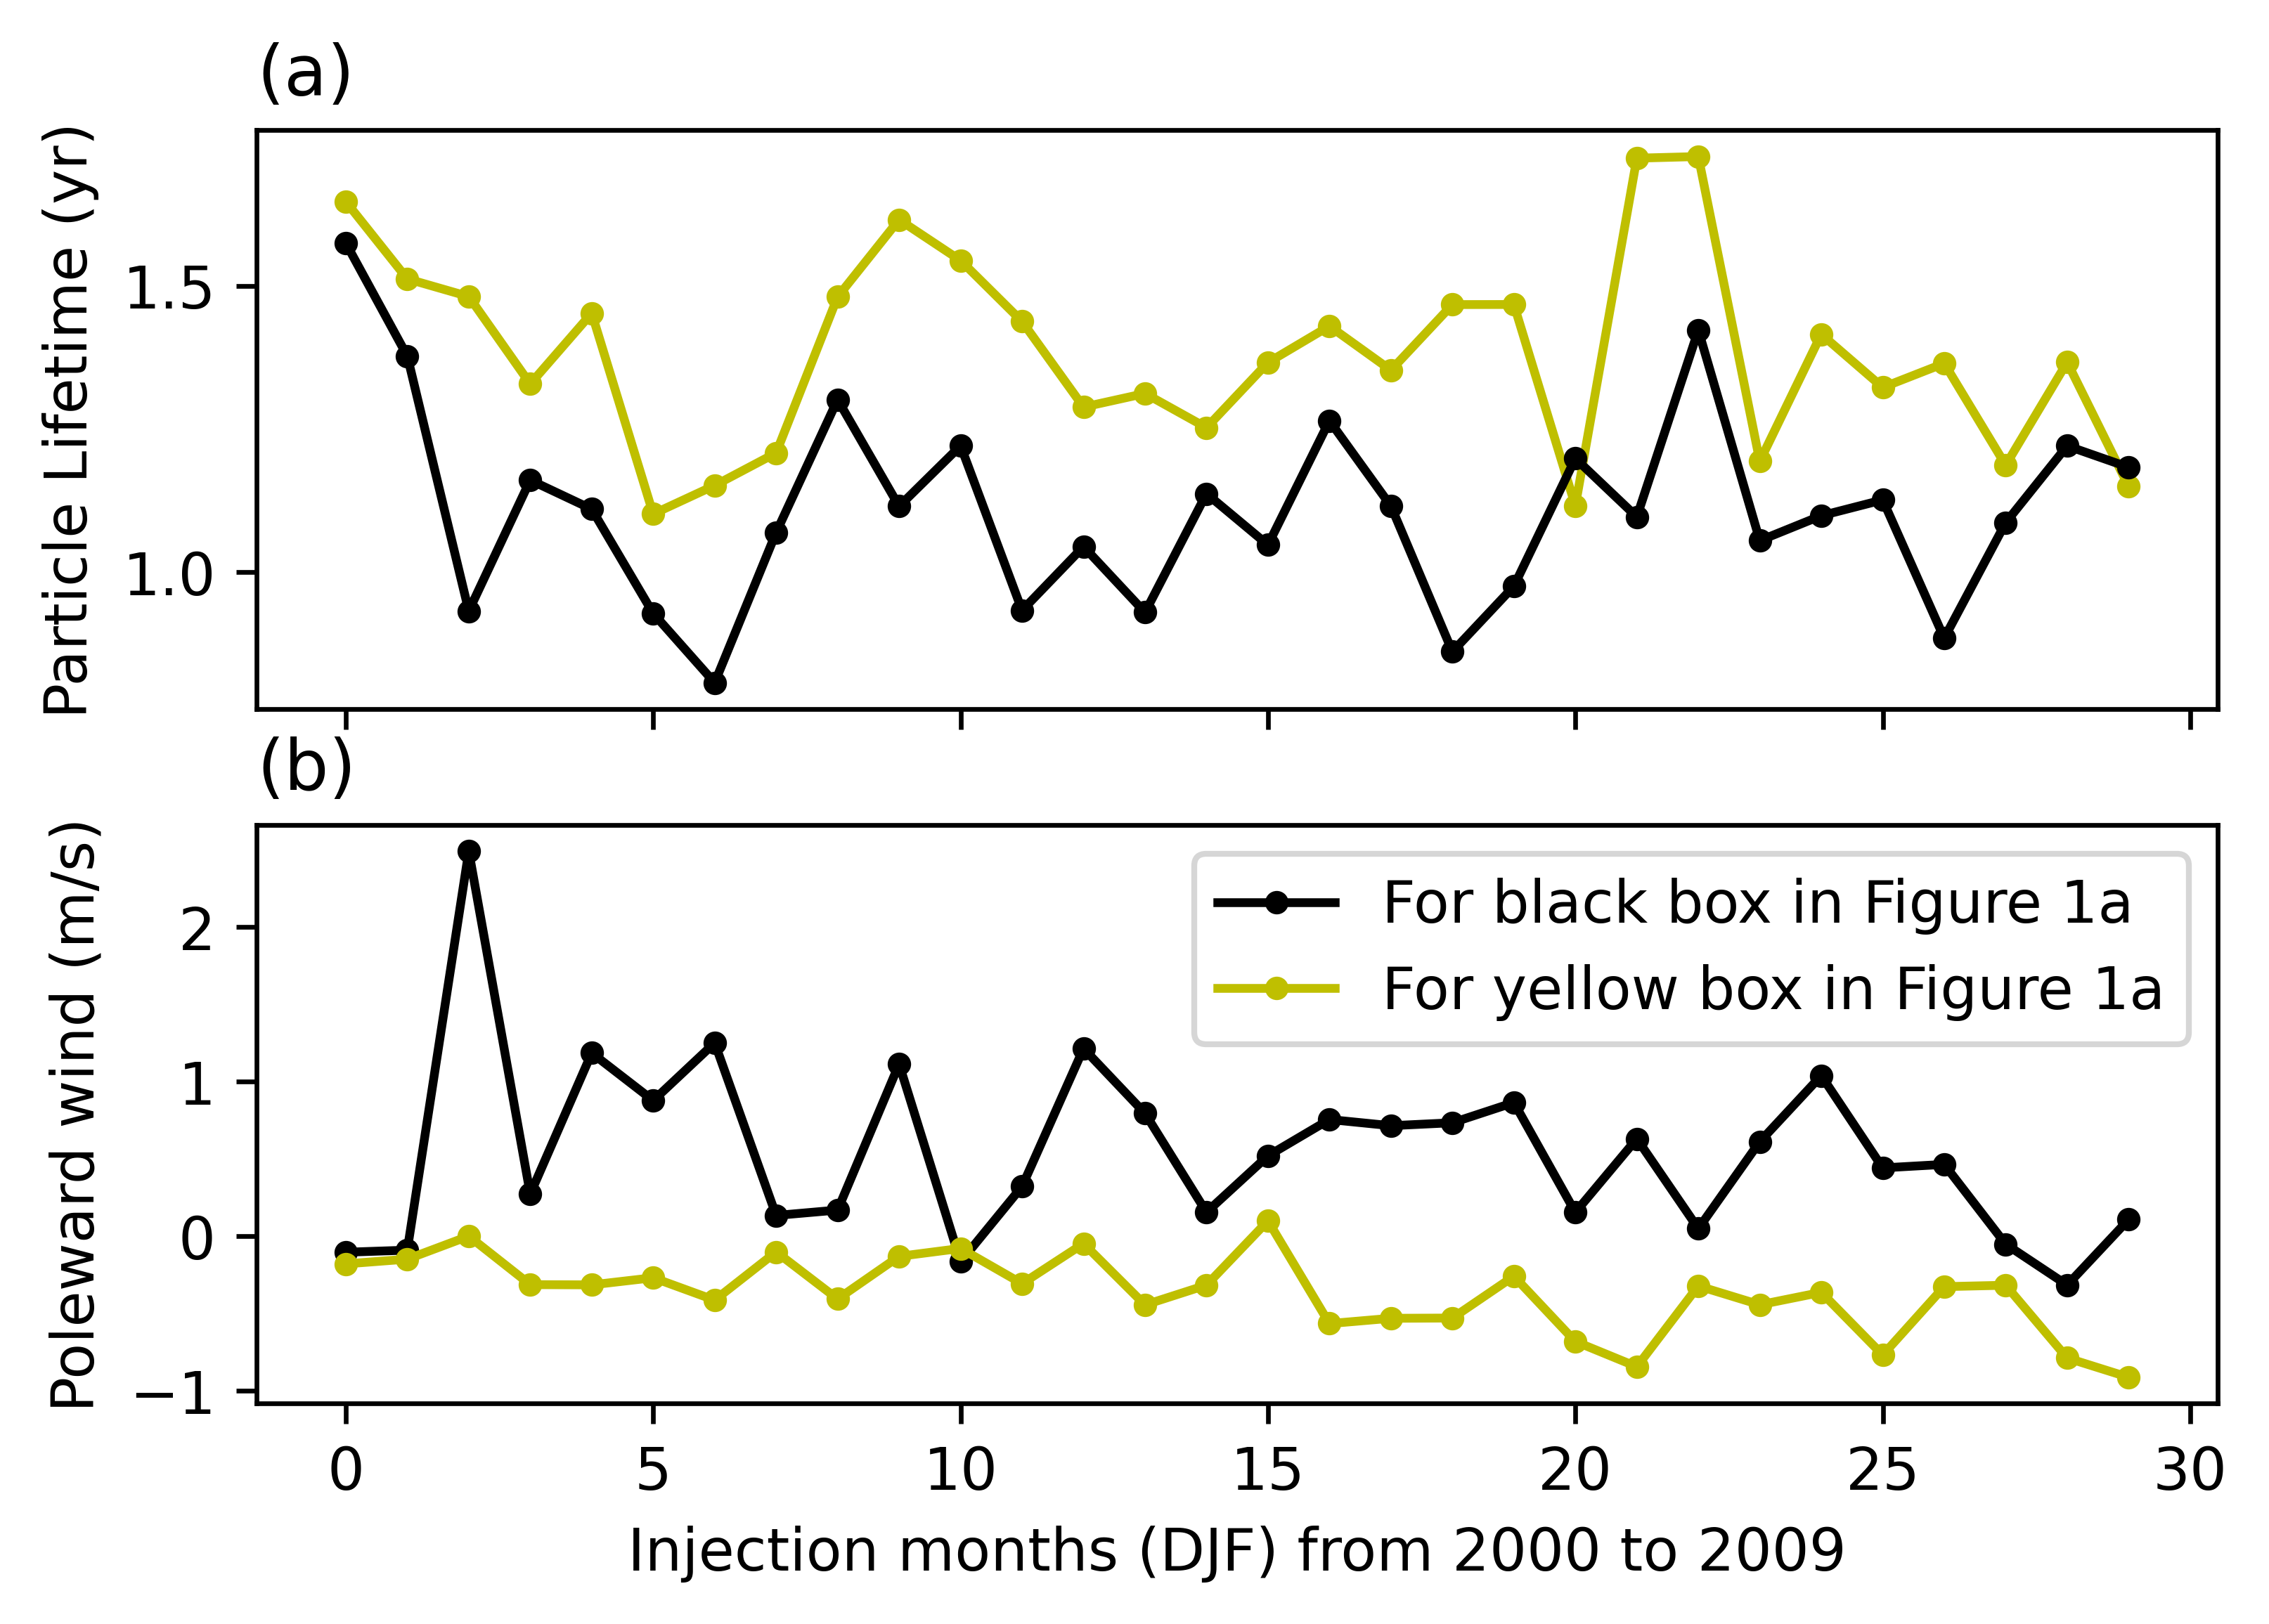

In [53]:
fig, ax = plt.subplots(2, figsize=(6,4), sharex=True, dpi=600)

# ax[0] = fig.add_subplot(2,1,1)
ax[0].plot(lifetime_red_series, 'y.-', label='East Pacific')
ax[0].plot(lifetime_blue_series, 'k.-', label='Indian Ocean')
ax[0].set_ylabel("Particle Lifetime (yr)")
ax[0].set_title("(a)", loc='left');

# ax[1] = fig.add_subplot(2,1,2)
ax[1].plot(V_black_N - V_black_S, 'k.-', label='For black box in Figure 1a')
ax[1].plot(V_red_N - V_red_S, 'y.-', label='For yellow box in Figure 1a')
ax[1].set_ylabel("Poleward wind (m/s)")
ax[1].set_xlabel("Injection months (DJF) from 2000 to 2009")
ax[1].set_title("(b)", loc='left');

ax[1].legend();
plt.savefig('Figure_3a.jpg')

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score




R2=[[ 1.         -0.57269728]
 [-0.57269728  1.        ]]


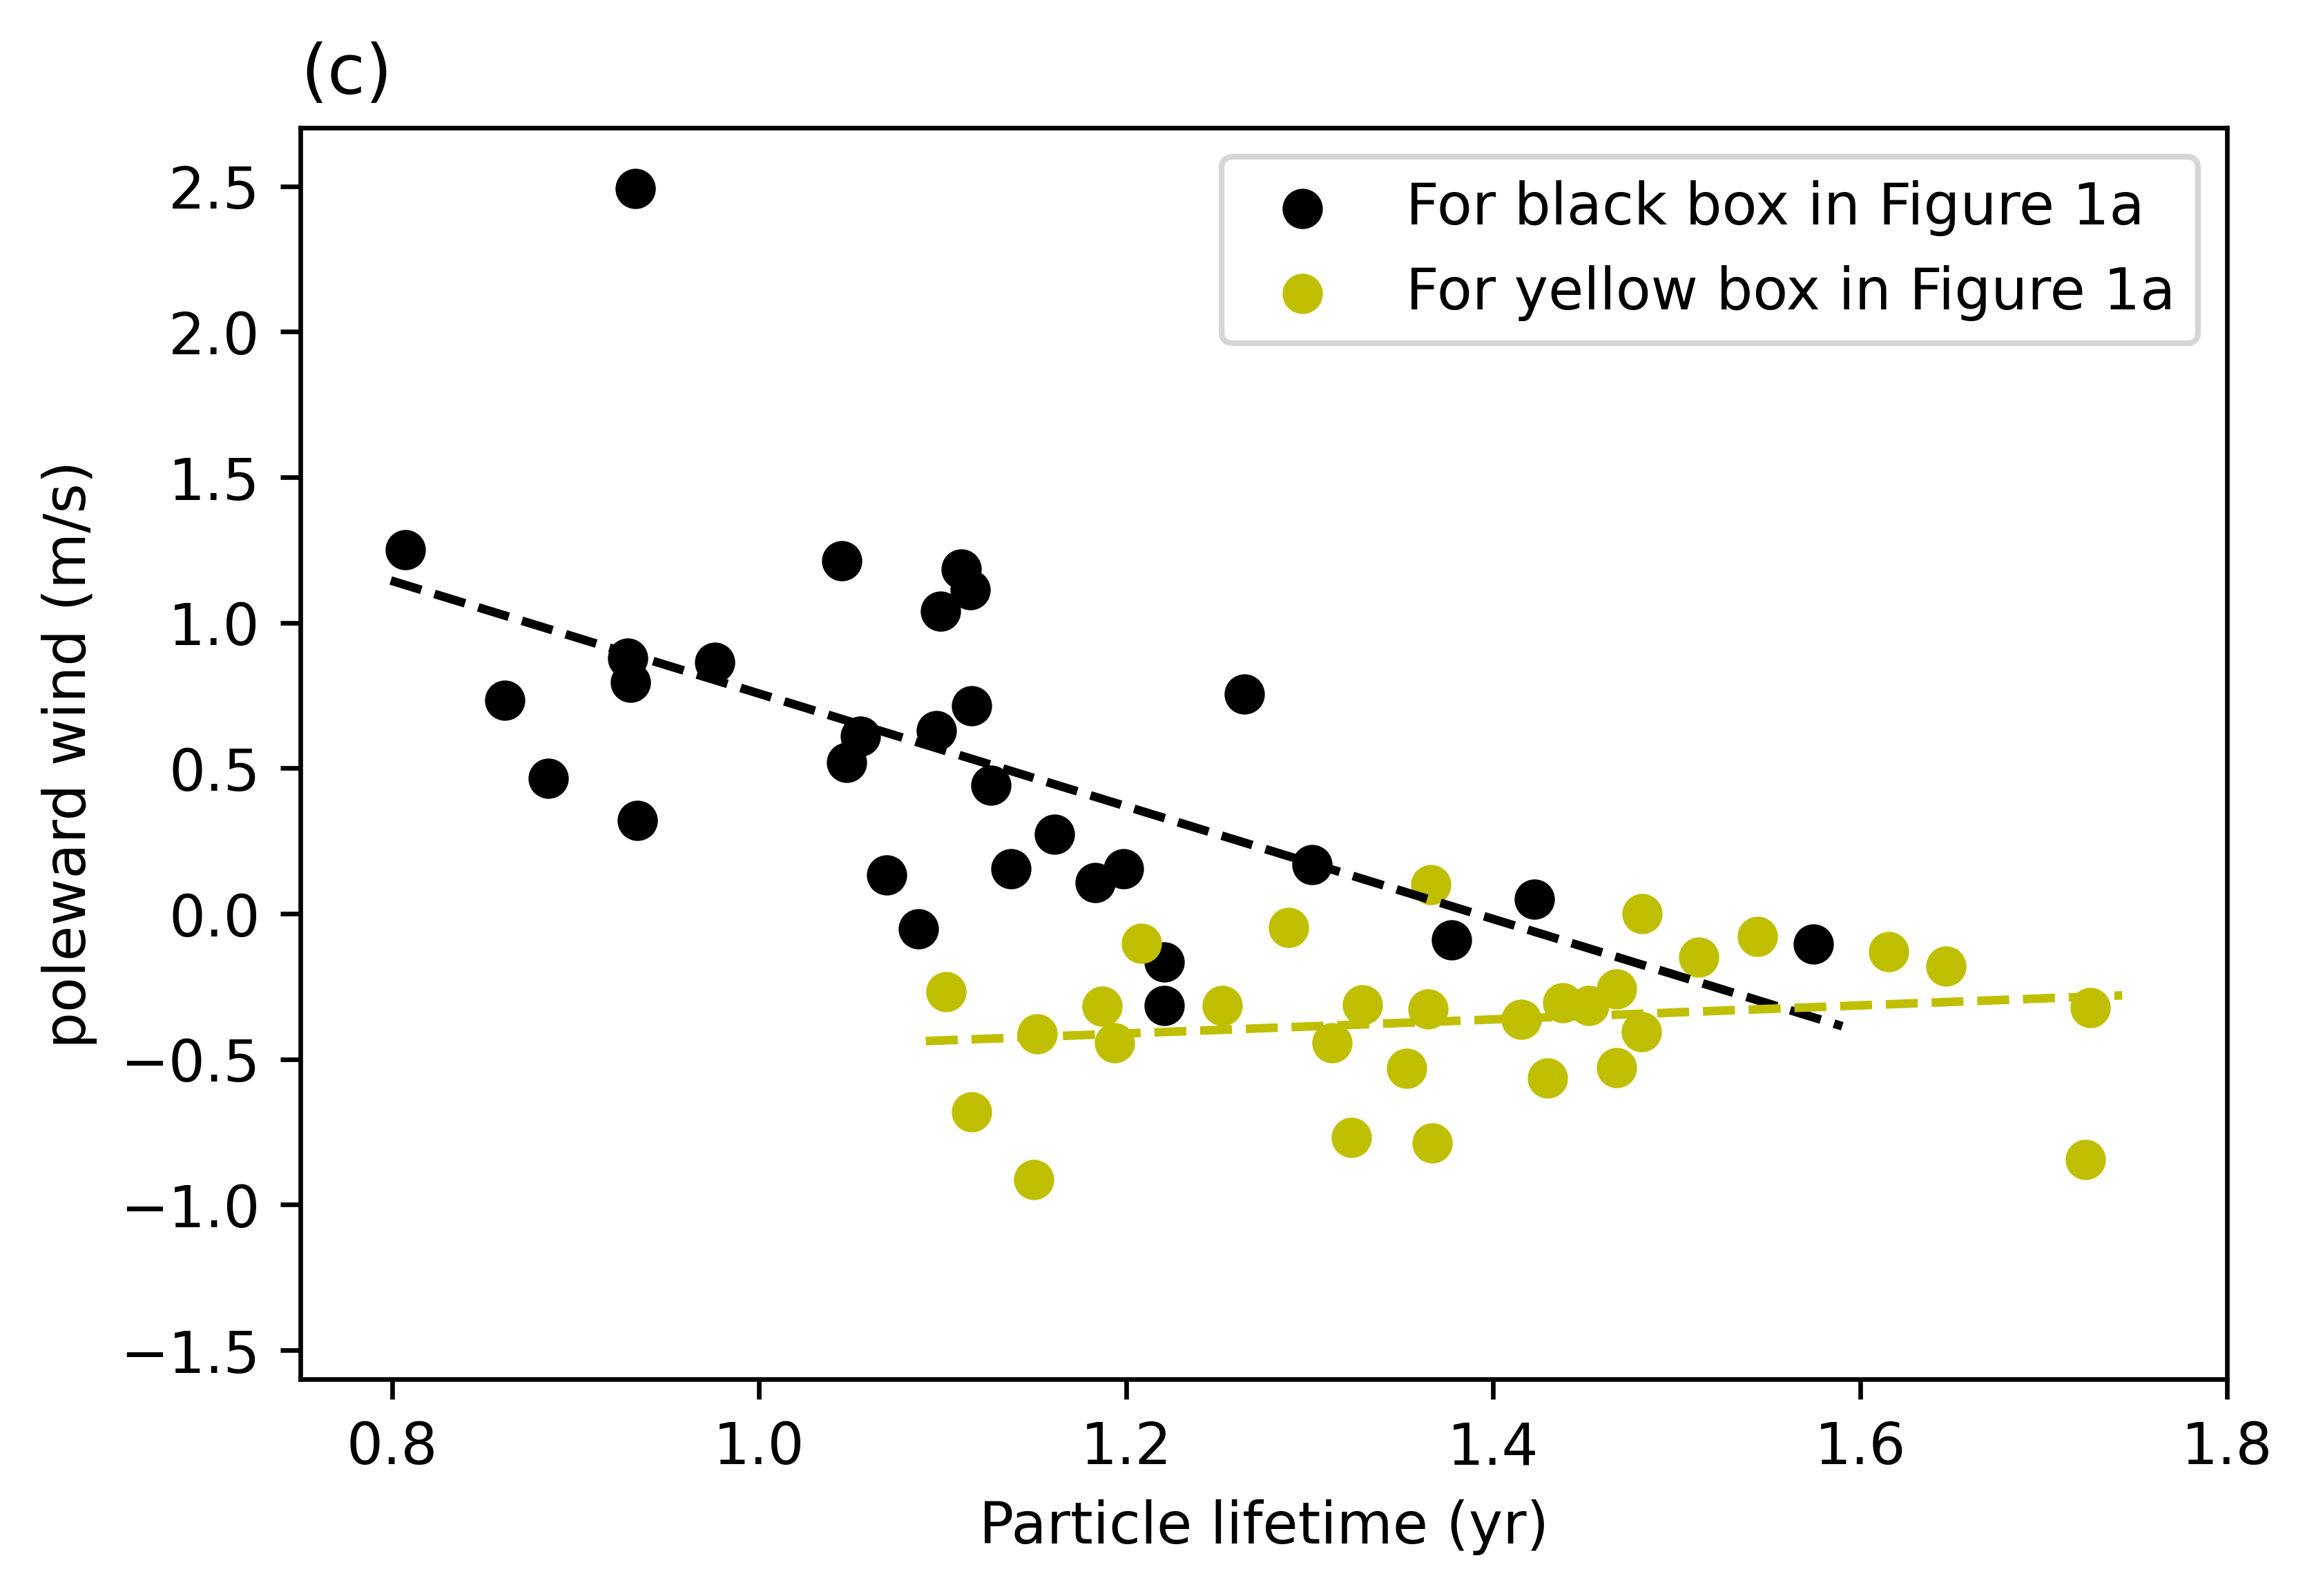

In [61]:
fig = plt.figure(figsize=(6,4), dpi=600)

### blue ---------------------------------------------
# Create linear regression object
regr2 = linear_model.LinearRegression()

X2_train = lifetime_blue_series[:, np.newaxis]
Y2_train = V_black_N - V_black_S

# Train the model using the training sets
regr2.fit(X2_train, Y2_train)

# Make predictions using the testing set
X2_pred = np.linspace(0.99*np.min(X2_train), 1.01*np.max(X2_train),100)
Y2_pred = regr2.predict(X2_pred[:, np.newaxis])

R2 = np.corrcoef(X2_train[:,0], Y2_train)
plt.scatter(lifetime_blue_series, V_black_N - V_black_S, color='black', label=f'For black box in Figure 1a')
plt.plot(X2_pred, Y2_pred, 'k--')

print(f"R2={R2}")

### red ---------------------------------------------
# Create linear regression object
regr1 = linear_model.LinearRegression()

X1_train = lifetime_red_series[:, np.newaxis]
Y1_train = V_red_N - V_red_S

# Train the model using the training sets
regr1.fit(X1_train, Y1_train)

# Make predictions using the testing set
X1_pred = np.linspace(0.99*np.min(X1_train), 1.01*np.max(X1_train),100)
Y1_pred = regr1.predict(X1_pred[:, np.newaxis])

R1 = np.corrcoef(X1_train[:,0], Y1_train)
plt.scatter(X1_train, Y1_train, color='y', label=f'For yellow box in Figure 1a')
plt.plot(X1_pred, Y1_pred, 'y--')

### ----------------------------------------------------
plt.xlim(0.75,1.8)
plt.ylim(-1.6,2.7)

plt.xlabel('Particle lifetime (yr)')
plt.ylabel("poleward wind (m/s)");
plt.title("(c)",loc='left')
plt.legend();

plt.savefig('Figure_3c.jpg')

# ax1 = fig.add_subplot(2,1,1)
# ax1.scatter(lifetime_red_series, V_red_N - V_red_)
# # ax1.plot(lifetime_red_series, 'r.-', label='East Pacific')
# # ax1.plot(lifetime_blue_series, 'k.-', label='Indian Ocean')
# # ax1.set_ylabel("Particle Lifetime (yr)")
# # ax1.legend();

# ax2 = fig.add_subplot(2,1,2)
# ax2.plot(V_red_N - V_red_S, 'r.-', label='Red box in Figure 2a')
# ax2.plot(V_black_N - V_black_S, 'k.-', label='Black box in Figure 2a')
# ax2.set_ylabel("Poleward wind (m/s)")
# ax2.set_xlabel("Winter months (DJF) from 2000 to 2009")
# ax2.legend();

In [56]:
np.mean(V_red_N - V_red_S), np.mean(V_black_N - V_black_S)

(<xarray.DataArray 'v' ()>
 array(-0.36739826, dtype=float32),
 <xarray.DataArray 'v' ()>
 array(0.54449433, dtype=float32))

In [57]:
vwnd = (V_black_N - V_black_S) -(V_red_N - V_red_S)
D_life = lifetime_red_series - lifetime_blue_series
vwnd

<xarray.DataArray 'v' (time: 30)>
array([ 0.07520279,  0.05825783,  2.4903748 ,  0.5859872 ,  1.499527  ,
        1.1461593 ,  1.6640747 ,  0.23596019,  0.5752391 ,  1.2434233 ,
       -0.08583822,  0.62823796,  1.2615877 ,  1.2386982 ,  0.47150835,
        0.42064753,  1.3198682 ,  1.2456983 ,  1.2632704 ,  1.1233276 ,
        0.8356682 ,  1.4743555 ,  0.37082988,  1.0545094 ,  1.401957  ,
        1.2100856 ,  0.7907047 ,  0.26544148,  0.47173446,  1.0202752 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2009-12-01

In [58]:
vwnd[9], D_life[9]

(<xarray.DataArray 'v' ()>
 array(1.2434233, dtype=float32)
 Coordinates:
     time     datetime64[ns] 2003-01-01,
 0.5002640070401876)

In [59]:
D_life

array([ 0.07244549,  0.13466315,  0.54889997,  0.16792803,  0.34191845,
        0.17351129,  0.34431407,  0.13888726,  0.17949545,  0.50026401,
        0.3233304 ,  0.50434145,  0.24349272,  0.38209641,  0.11521463,
        0.31840227,  0.1652293 ,  0.23703921,  0.60572015,  0.49175711,
       -0.08283954,  0.62603892,  0.30300186,  0.1383788 ,  0.31664222,
        0.19635279,  0.47964212,  0.10032268,  0.14596656, -0.03349956])

In [60]:
pl

NameError: name 'pl' is not defined

# For dissertation

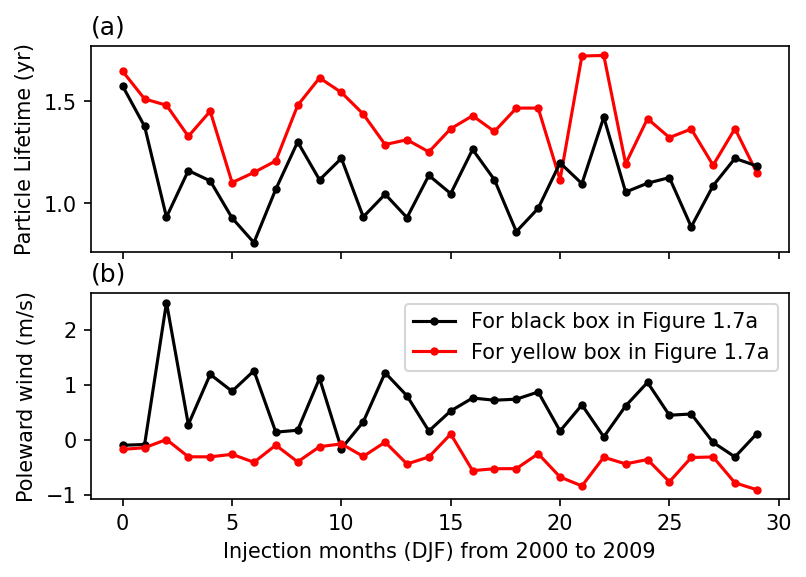

In [31]:
fig, ax = plt.subplots(2, figsize=(6,4), sharex=True, dpi=150)

# ax[0] = fig.add_subplot(2,1,1)
ax[0].plot(lifetime_red_series, 'r.-', label='East Pacific')
ax[0].plot(lifetime_blue_series, 'k.-', label='Indian Ocean')
ax[0].set_ylabel("Particle Lifetime (yr)")
ax[0].set_title("(a)", loc='left');

# ax[1] = fig.add_subplot(2,1,2)
ax[1].plot(V_black_N - V_black_S, 'k.-', label='For black box in Figure 1.7a')
ax[1].plot(V_red_N - V_red_S, 'r.-', label='For yellow box in Figure 1.7a')
ax[1].set_ylabel("Poleward wind (m/s)")
ax[1].set_xlabel("Injection months (DJF) from 2000 to 2009")
ax[1].set_title("(b)", loc='left');

ax[1].legend();

R2=[[ 1.         -0.57269728]
 [-0.57269728  1.        ]]


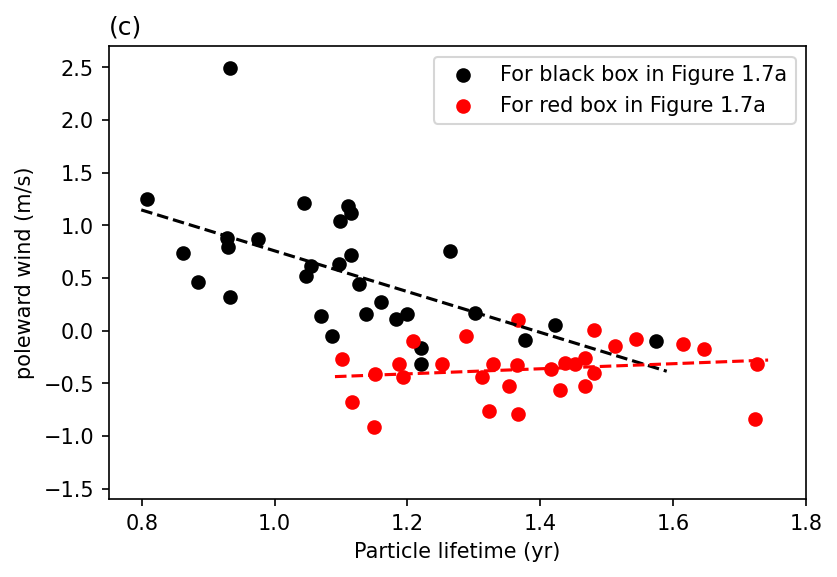

In [32]:
fig = plt.figure(figsize=(6,4), dpi=150)

### blue ---------------------------------------------
# Create linear regression object
regr2 = linear_model.LinearRegression()

X2_train = lifetime_blue_series[:, np.newaxis]
Y2_train = V_black_N - V_black_S

# Train the model using the training sets
regr2.fit(X2_train, Y2_train)

# Make predictions using the testing set
X2_pred = np.linspace(0.99*np.min(X2_train), 1.01*np.max(X2_train),100)
Y2_pred = regr2.predict(X2_pred[:, np.newaxis])

R2 = np.corrcoef(X2_train[:,0], Y2_train)
plt.scatter(lifetime_blue_series, V_black_N - V_black_S, color='black', label=f'For black box in Figure 1.7a')
plt.plot(X2_pred, Y2_pred, 'k--')

print(f"R2={R2}")

### red ---------------------------------------------
# Create linear regression object
regr1 = linear_model.LinearRegression()

X1_train = lifetime_red_series[:, np.newaxis]
Y1_train = V_red_N - V_red_S

# Train the model using the training sets
regr1.fit(X1_train, Y1_train)

# Make predictions using the testing set
X1_pred = np.linspace(0.99*np.min(X1_train), 1.01*np.max(X1_train),100)
Y1_pred = regr1.predict(X1_pred[:, np.newaxis])

R1 = np.corrcoef(X1_train[:,0], Y1_train)
plt.scatter(X1_train, Y1_train, color='r', label=f'For red box in Figure 1.7a')
plt.plot(X1_pred, Y1_pred, 'r--')



### ----------------------------------------------------
plt.xlim(0.75,1.8)
plt.ylim(-1.6,2.7)

plt.xlabel('Particle lifetime (yr)')
plt.ylabel("poleward wind (m/s)");
plt.title("(c)",loc='left')
plt.legend();